In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

import Pacejka52 as pa52
from scipy.optimize import curve_fit

import TMeasy_fit as tm
import TMeasy_Rill_fitting as tr
import TMeasy_Rill as tm_rill

i=101


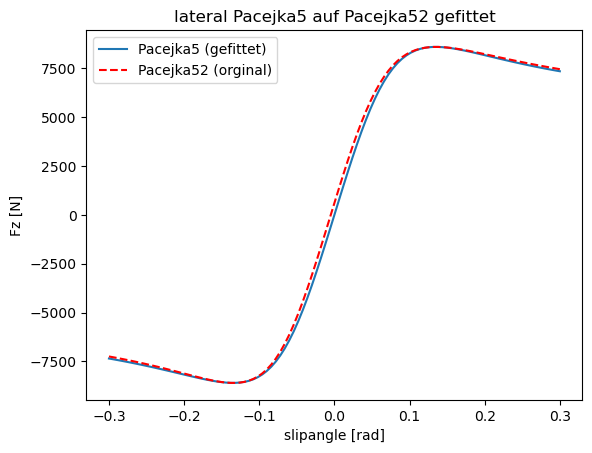

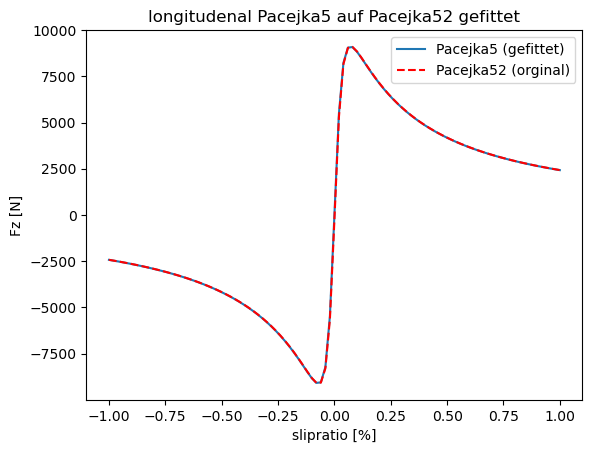

In [21]:

Fz = 5000
Fz0 = 8000
IA = 0

Sx = np.linspace(-1,1,i)
Sy = np.linspace(-0.3,0.3,i)

Fy_pa52 = pa52.Pacejka52_lat(Fz,Sy,IA,Fz0)[0]
Fx_pa52 = pa52.Pacejka52_long(Fz,Sx,IA,Fz0)[0]

#intial guess
Fy_params_init = [-8,1.6,11000,-3]
Fx_params_init = [17,2,9000,0.62]

def func_Fy(Sx,B,C,D,E):
    return pa52.Pacejka5_lat_pa(Sy,Fz,B,C,D,E)

def func_Fx(Sx,B,C,D,E):
    return pa52.Pacejka5_long_pa(Sx,Fz,B,C,D,E)

# perform the optimization
Fy_params, _ = curve_fit(func_Fy, Sy, Fy_pa52, Fy_params_init )
Fx_params, _ = curve_fit(func_Fx, Sx, Fx_pa52, Fx_params_init, maxfev=100000)
 

#plot
Fy_fit = func_Fy(Sy,Fy_params[0],Fy_params[1],Fy_params[2],Fy_params[3])
Fx_fit = func_Fx(Sx,Fx_params[0],Fx_params[1],Fx_params[2],Fx_params[3])

plt.figure(1)
plt.plot(Sy,Fy_fit)
plt.plot(Sy,Fy_pa52,'r--')
plt.xlabel('slipangle [rad]')
plt.ylabel('Fz [N]')
plt.title('lateral Pacejka5 auf Pacejka52 gefittet')
plt.legend(['Pacejka5 (gefittet)','Pacejka52 (orginal)'])


plt.figure(2)
plt.plot(Sx,Fx_fit)
plt.plot(Sx,Fx_pa52,'r--')
plt.xlabel('slipratio [%]')
plt.ylabel('Fz [N]')
plt.title('longitudenal Pacejka5 auf Pacejka52 gefittet')
plt.legend(['Pacejka5 (gefittet)','Pacejka52 (orginal)'])


In [22]:
################################################################################
#vergleich parameter   
################################################################################

print(Fy_params)
print(pa52.Pacejka52_lat(Fz,Sy,IA,Fz0)[2],pa52.Pacejka52_lat(Fz,Sy,IA,Fz0)[3],pa52.Pacejka52_lat(Fz,Sy,IA,Fz0)[1],pa52.Pacejka52_lat(Fz,Sy,IA,Fz0)[4])

print(Fx_params)
print(pa52.Pacejka52_long(8000,Sx,IA,Fz0)[2],pa52.Pacejka52_long(8000,Sx,IA,Fz0)[3],pa52.Pacejka52_long(8000,Sx,IA,Fz0)[1],pa52.Pacejka52_long(8000,Sx,IA,Fz0)[4])

[-9.06434405  1.60162373 -1.72069169 -0.80265574]
-9.111787506527305 1.603 8604.3125 -0.57457550825
[17.04378049  1.99996234  1.82504605  0.62177794]
18.566518429399228 2.0 13734.400000000001 510000.0


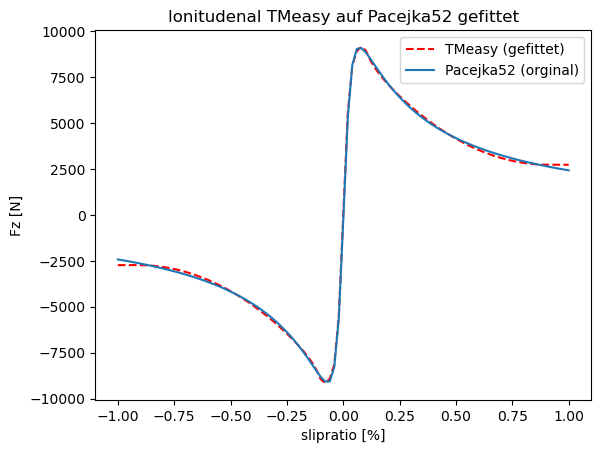

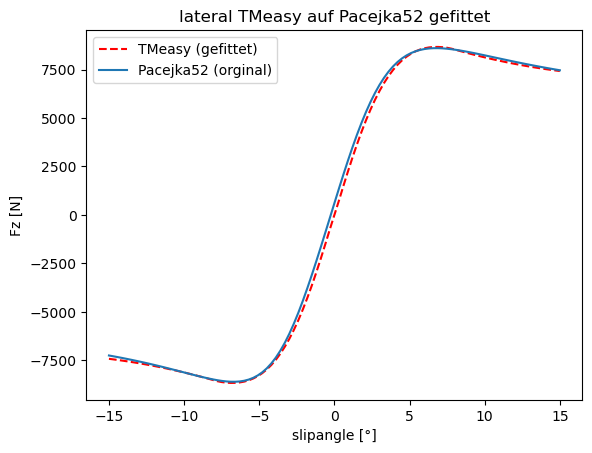

In [23]:
################################################################################
#TMeasy auf Pacejka52
################################################################################


SX = np.linspace(-1,1,i)
SY = np.linspace(-15,15,i)
LMU = 1

#case 1 -> Fx, case 2 -> Fy

#Parameters
dfx0 = 32529
dfy0 = 30163   # init slopes in N/-
fxm  = 1851.8
fym  = 1604.2   # maximum forces in N
sxm  = 0.2183
sym  = 0.2031   # sm where f(sm) = fm
fxs  = 1188.4
fys  = 1072.7   # sliding forces in N
sxs  = 0.7725
sys  = 0.7978

#intital guess
Fx_tm_params_init = [30000,1800,0.2,1100,0.8]
Fy_tm_params_init = [30000,1800,0.2,1100,0.8]

def Fx_tm_func(SX,dfx0,fxm,sxm,fxs,sxs):
    return tr.TMeasy_single(dfx0,dfy0,fxm,fym,sxm,sym,fxs,fys,sxs,sys,i,1)

def Fy_tm_func(SY,dfy0,fym,sym,fys,sys):
    return tr.TMeasy_single(dfx0,dfy0,fxm,fym,sxm,sym,fxs,fys,sxs,sys,i,2)

Fx_tm_params, _ = curve_fit(Fx_tm_func, SX, Fx_pa52, Fx_tm_params_init,maxfev = 10000)
Fy_tm_params, _ = curve_fit(Fy_tm_func, SY, Fy_pa52, Fy_tm_params_init,maxfev = 10000)

Fx_tm_fit = Fx_tm_func(SX,Fx_tm_params[0],Fx_tm_params[1],Fx_tm_params[2],Fx_tm_params[3],Fx_tm_params[4])
Fy_tm_fit = Fy_tm_func(SY,Fy_tm_params[0],Fy_tm_params[1],Fy_tm_params[2],Fy_tm_params[3],Fy_tm_params[4])

plt.figure(1)
plt.plot(SX,Fx_tm_fit,'r--')
plt.plot(SX,Fx_pa52)
plt.xlabel('slipratio [%]')
plt.ylabel('Fz [N]')
plt.title('lonitudenal TMeasy auf Pacejka52 gefittet')
plt.legend(['TMeasy (gefittet)','Pacejka52 (orginal)'])

plt.figure(2)
plt.plot(SY,Fy_tm_fit,'r--')
plt.plot(SY,Fy_pa52)
plt.xlabel('slipangle [°]')
plt.ylabel('Fz [N]')
plt.title('lateral TMeasy auf Pacejka52 gefittet')
plt.legend(['TMeasy (gefittet)','Pacejka52 (orginal)'] )


In [24]:
################################################################################
#vergleich parameter TMeasy
################################################################################

print(Fx_tm_params)
print(Fy_tm_params)

[ 6.97899445e+04  9.64500207e+03 -9.19441505e-01  2.73393560e+03
  3.30185693e+02]
[6.68472808e+04 8.67684274e+03 8.90626817e-04 7.16404658e+03
 5.20578263e-01]


Text(0.5, 1.0, 'lateral TMeasy')

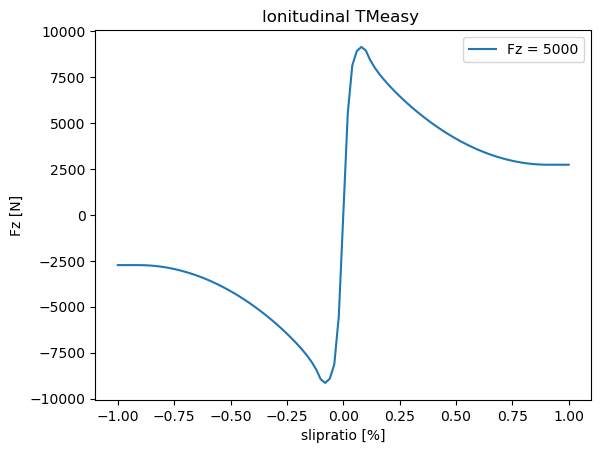

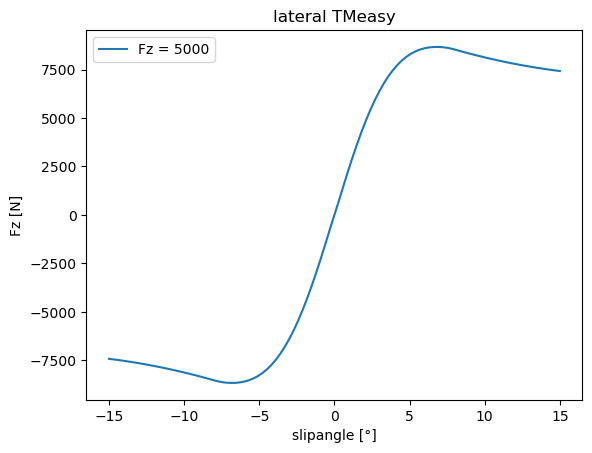

In [25]:
plt.figure(1)
plt.plot(SX,Fx_tm_fit,label = 'Fz = 5000')
plt.legend()
#plt.plot(SX,Fx_pa52)
plt.xlabel('slipratio [%]')
plt.ylabel('Fz [N]')
plt.title('lonitudinal TMeasy ')
#plt.legend(['TMeasy (gefittet)','Pacejka52 (orginal)'])

plt.figure(2)
plt.plot(SY,Fy_tm_fit,label = 'Fz = 5000')
plt.legend()
#plt.plot(SY,Fy_pa52)
plt.xlabel('slipangle [°]')
plt.ylabel('Fz [N]')
plt.title('lateral TMeasy')
#plt.legend(['TMeasy (gefittet)','Pacejka52 (orginal)'] )


c:\Users\bener\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


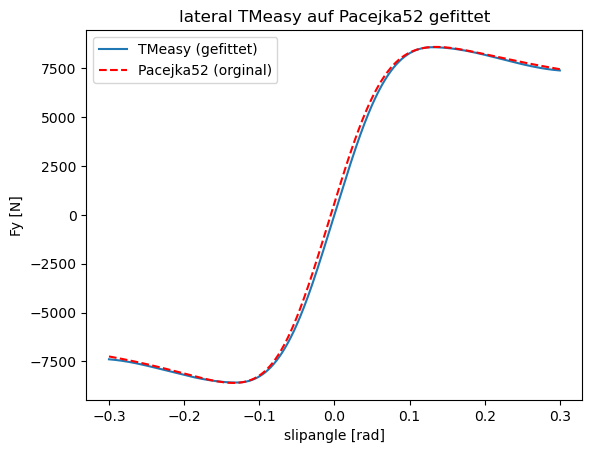

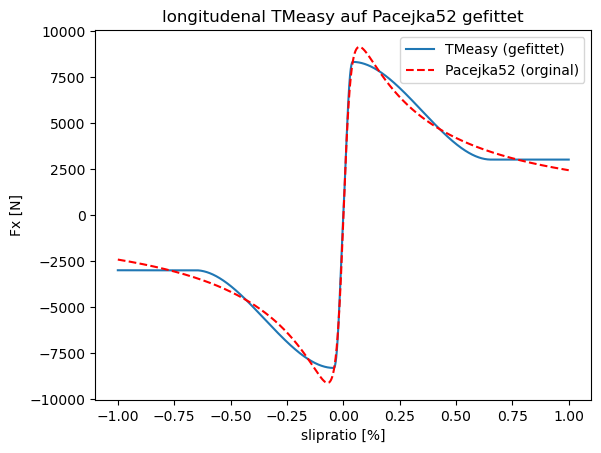

In [1]:
#######################################
#TMeasy TUfast/Paco
#######################################

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit

import TMeasy_model_Paco as tmpa
import Pacejka52 as pa52


i = 10000
SX = np.linspace(-1,1,i)
SY = np.linspace(-0.3,0.3,i)

Fz = 5000
Fz0 = 8000
IA = 0

#Daten auf de gefitted wird
Fy_pa52 = pa52.Pacejka52_lat(Fz,SY,IA,Fz0)[0]
Fx_pa52 = pa52.Pacejka52_long(Fz,SX,IA,Fz0)[0]

#intial guess
Fy_params_init = [40000, 6000, 4000, 0.1, 0.7, 0.5]
Fx_params_init = [240000, 9000, 4000, 0.1, 0.9, 0.9]

def func_Fy(SY,DFY, FMY, FSY, SMY, SSY,SMX):
    return tmpa.calcFY(SX, SY, DFY, FMY, FSY, SMY, SSY,SMX)

def func_Fx(SX,DFX, FMX, FSX, SMX,SSX, SMY):
    return tmpa.calcFx( SX, SY, DFX, FMX, FSX, SMX,SSX, SMY)

# perform the optimization
Fy_params, _ = curve_fit(func_Fy, SY, Fy_pa52, Fy_params_init )
Fx_params, _ = curve_fit(func_Fx, SX, Fx_pa52, Fx_params_init, maxfev=100000)


#plot
Fy_fit = func_Fy(SY,Fy_params[0],Fy_params[1],Fy_params[2],Fy_params[3],Fy_params[4],Fy_params[5])
Fx_fit = func_Fx(SX,Fx_params[0],Fx_params[1],Fx_params[2],Fx_params[3],Fx_params[4],Fx_params[5])


plt.figure(1)
plt.plot(SY,Fy_fit)
plt.plot(SY,Fy_pa52,'r--')
plt.xlabel('slipangle [rad]')
plt.ylabel('Fy [N]')
plt.title('lateral TMeasy auf Pacejka52 gefittet')
plt.legend(['TMeasy (gefittet)','Pacejka52 (orginal)'])


plt.figure(2)
plt.plot(SX,Fx_fit)
plt.plot(SX,Fx_pa52,'r--')
plt.xlabel('slipratio [%]')
plt.ylabel('Fx [N]')
plt.title('longitudenal TMeasy auf Pacejka52 gefittet')
plt.legend(['TMeasy (gefittet)','Pacejka52 (orginal)'])

In [2]:
print(Fx_params)
print(Fy_params)

[ 2.36956924e+05 -8.31234170e+03 -3.00584579e+03 -4.20761657e-02
 -6.55582132e-01 -1.44859540e+04]
[1.23127938e+05 1.29411787e+04 1.11142165e+04 1.96205274e-01
 4.74479427e-01 5.80072480e-01]
